# Importing Libraries

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset 

In [6]:
df = pd.read_excel("feedback.xlsx")

## Text Preprocessing & TF-IDF Vectorization 

In [8]:
df['feedback'] = df['feedback_text'].fillna('').astype(str).str.lower()

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.9,       # ignore very common words
    min_df=2,         # ignore very rare words
    max_features=1000 # optional, to limit feature space
)

tfidf_matrix = vectorizer.fit_transform(df['feedback_text'])
feature_names = vectorizer.get_feature_names_out()

## Appliying NMF Model

In [10]:
n_topics = 5 
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


## Topic Extraction

In [13]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(", ".join(top_words))

display_topics(nmf_model, feature_names, 10)


Topic 1:
driven, course, personalized, topics, complex, feel, making, approachable, learning, pace

Topic 2:
experience, overall, helpful, useful, features, tutor, neutral, strong, average, lacked

Topic 3:
use, real, excellent, practice, world, tailor, problems, progress, examples, integration

Topic 4:
feedback, helped, timely, stay, quickly, track, clear, motivated, actionable, improve

Topic 5:
felt, repetitive, generic, modules, content, generated, guidance, decent, course, explanations


## Assigning Dominant Topic per Feedback

In [23]:
topic_values = nmf_model.transform(tfidf_matrix)
df['Dominant_Topic'] = topic_values.argmax(axis=1) + 1 

topic_strength = topic_values.sum(axis=0)
topic_strength = normalize(topic_strength.reshape(1, -1)).flatten()

## Visualization

C:\Users\parth\AppData\Local\Temp\ipykernel_23416\2986268896.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', n_topics)(np.arange(n_topics))


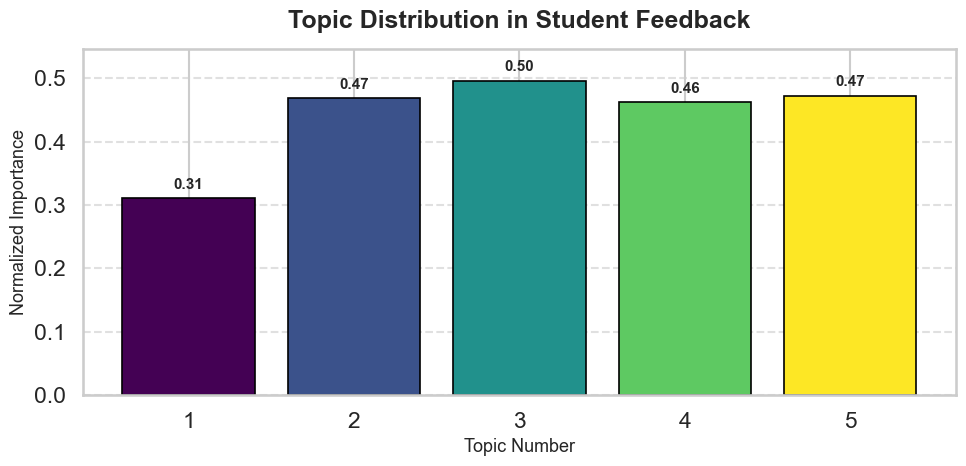

In [24]:
colors = cm.get_cmap('viridis', n_topics)(np.arange(n_topics))
sns.set(style='whitegrid', context='talk')

plt.figure(figsize=(10, 5))
bars = plt.bar(range(1, n_topics + 1), topic_strength, color=colors, edgecolor='black', linewidth=1.2)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f"{height:.2f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Topic Distribution in Student Feedback", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Topic Number", fontsize=13)
plt.ylabel("Normalized Importance", fontsize=13)
plt.xticks(range(1, n_topics + 1))
plt.ylim(0, max(topic_strength) + 0.05)
plt.tight_layout()
plt.style.use("dark_background")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()